In [2]:
import sys
sys.path.append("..")

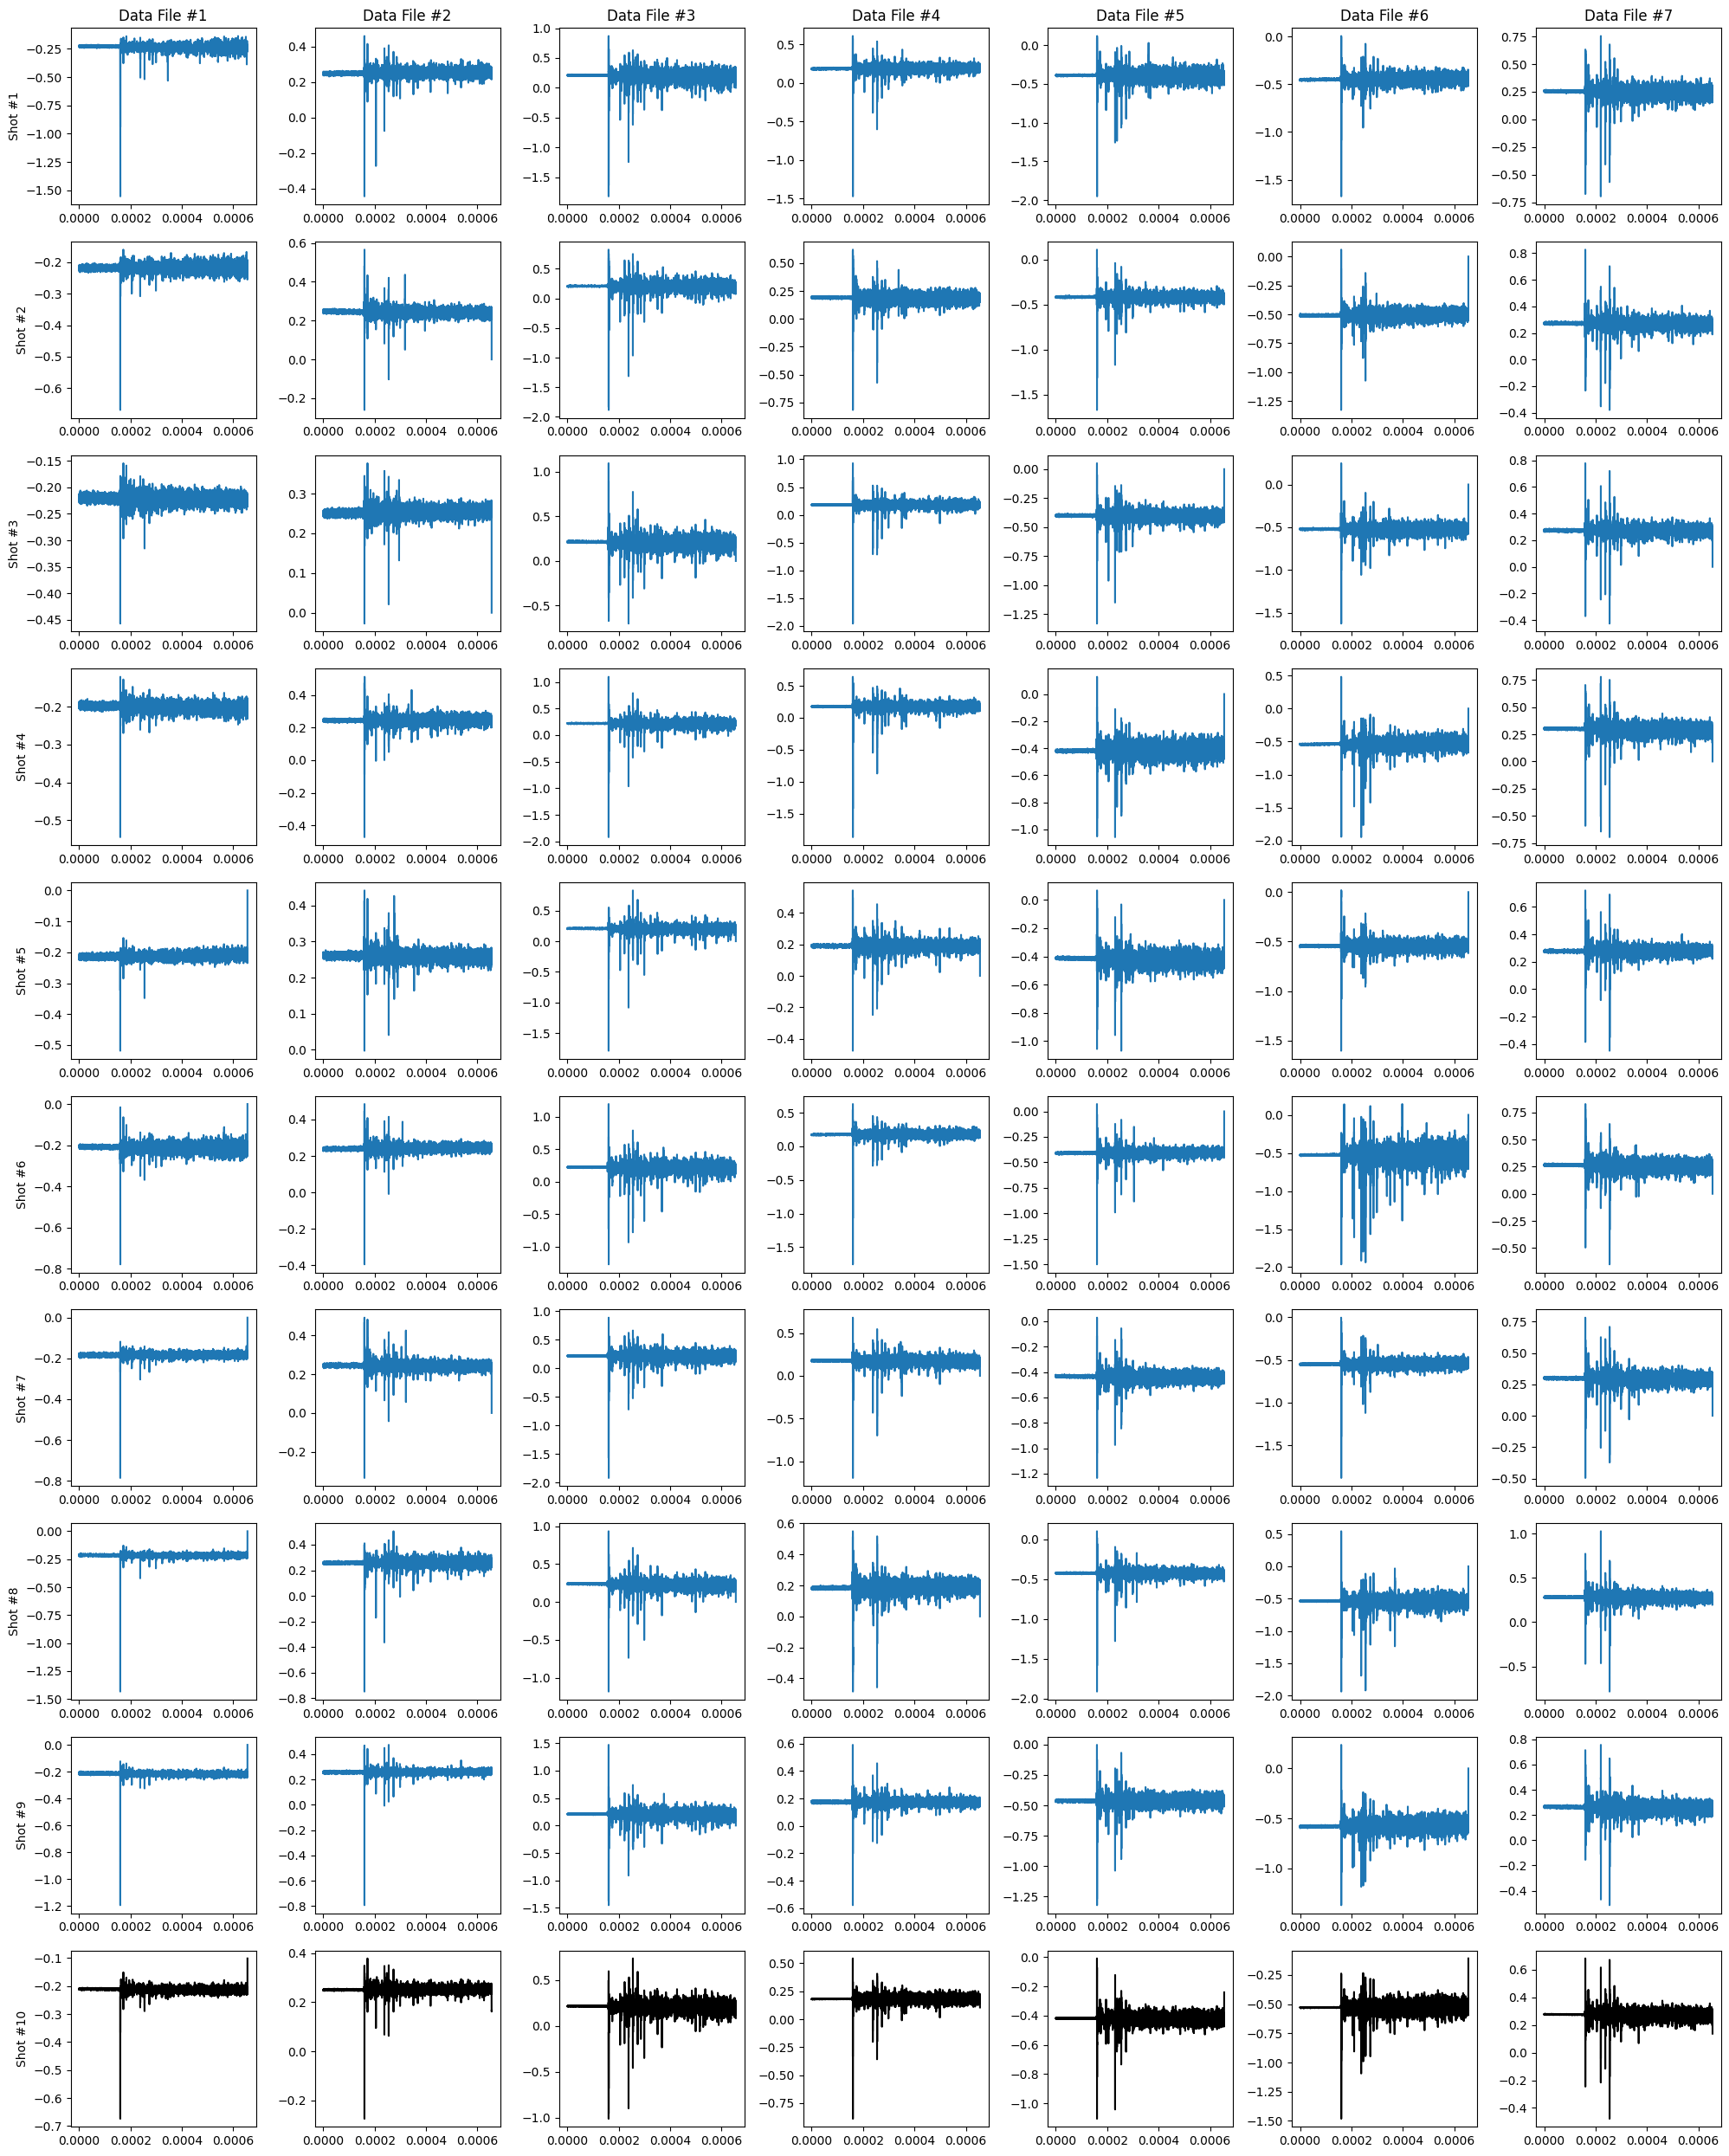

In [3]:
import analysis 
import matplotlib.pyplot as plt

s = analysis.System("sagnac", ["../../data/20240430/underwater_ablation_" + str(i + 1) + "cm/iter_0.tdms" for i in range(7)], channel = "Y")

fig, ax = plt.subplots(len(s.get_data()[0].collection), len(s.get_data()), figsize = (20, 25))
for i, d in enumerate(s.get_data()):
    ax[0][i].set_title("Data File #" + str(i + 1))
    for j in range(len(d.collection)):
        if i == 0:
            ax[j][0].set_ylabel("Shot #" + str(j + 1))
        # ALL DATA FILES
        # ax[j][i].set_xlim([0.000159, 0.000165]) 
        # first signal! This is obviously the albation's initial sound passing the detector arm

        # DF = 0
        # ax[j][0].set_xlim([0.000170, 0.000175]) 
        # second signal: this is a prominent feature in the signal. Based on its arrival time, and 
        # relatively small amplitude, I assume that this may be reflection from the aluminum plate
        # sitting about 7 cm from the front wall of the tank. This means that there should be around
        # ~ 1.5 cm between the wall and the Al block. Estimated time of travel = 0.0000101351s. This 
        # actually seems to be close to accurate here
        # ax[j][0].set_xlim([0.000175, 0.0002]) 
        # "third signal": I put this in quotes because there is actually many more than just one signal in this section. 
        # I believe that these signals are most likely reflections that have occured with the perpendicular walls to the
        # detection arm and possibly the gap between the back wall and the block. They seem to be small in amplitude and 
        # somewhat periodic in their occurences. 
        # ax[j][0].set_xlim([0.0002, 0.00021]) 
        # "fourth signal": there are quite a few interesting low amplitude signals here. The most prominent of these
        # lies somewhat in the middle of this time range.
        # Multiple other reflections? During the rest of the trace, there are other signals to be analyzed.
        
        # DF = 1
        # ax[j][1].set_xlim([0.000170, 0.000175]) 
        # second signal: there isn't a noticable difference between the time of arrival of this signal as compared 
        # to the one seen in df 0. Especially looking at shot to shot comparisons, there is practically no difference 
        # in the arrival time. 
        
        # DF = 2
        
        # DF = 3

        # DF = 4

        # DF = 5

        # DF = 6
        # ax[j][i].set_xlim([0.000165, 0.0002]) 
        # ax[j][i].set_xlim([0.000159, 0.000165]) 
        
        if j < len(d.collection[1:]):
            ax[j][i].plot(d.collection[j + 1].t, d.collection[j + 1].x)
        else:
            d.apply("lowpass", cutoff = 12e6, inplace = True)
            d.apply("bin_average", Npts = int(d.r / (12e6 * 2)))
            d.aggrigate(collection_slice = slice(1, len(d.collection), 1))
            ax[j][i].plot(d.agg.t, d.agg.x, c = "k")
    s.set_data([], ind = i)
fig.tight_layout()

# Ideas

One thing that I think could be done to improve progress toward using these signals for imaging is creating a predictable ultrasonic signal. It'd be useful to have a signal that is more predictable than the ones that we're seeing in the plots above. In shot-to-shot graphs, it can be seen that the signal changes drastically. It'd most likely be in my best interest to focus the experiment on using only thermoelastically produced signals rather than ablation signals. I believe that because these signals won't change the physical front where the 532nm laser is ablating, we'd see more uniform signals across shots where nothing is being changed. For now, I'm going to move on to just looking at the aggregate signals for comparison of the changing geometry inside the tank.

# Analyzing the aggregate signals

It seems that I was mistaken and the true wall reflection signal is occuring at ~0.000174s. As can be seen above, in the later signals (AKA the signals where the wall is farther away from the ablation site) the reflection seems to occur slightly later in time. We can try to estimate the time of flight for an ultrasonic sound wave in water travelling 1 cm. It should be about 0.0000067568

0.03996000000000001
6.756756756756757e-06


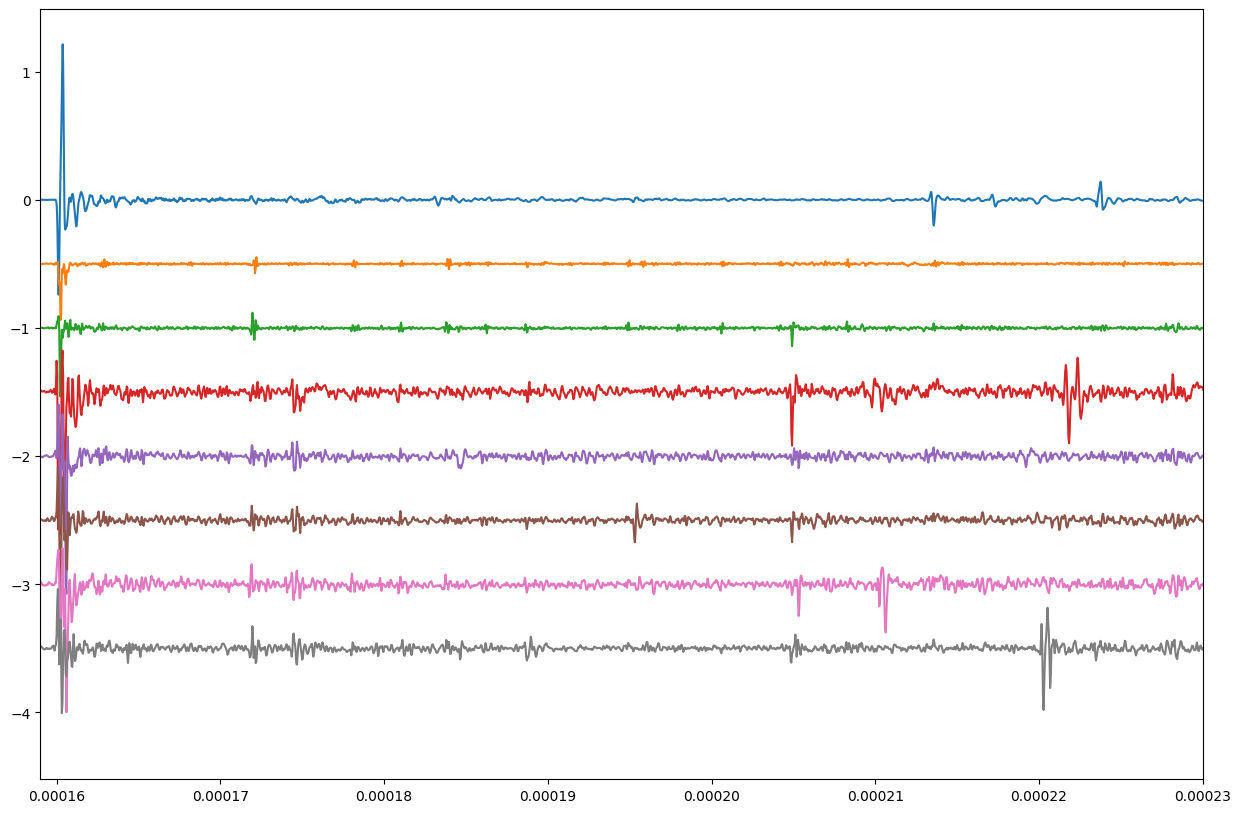

1280.1064741211712 +/- 181.59104849846528


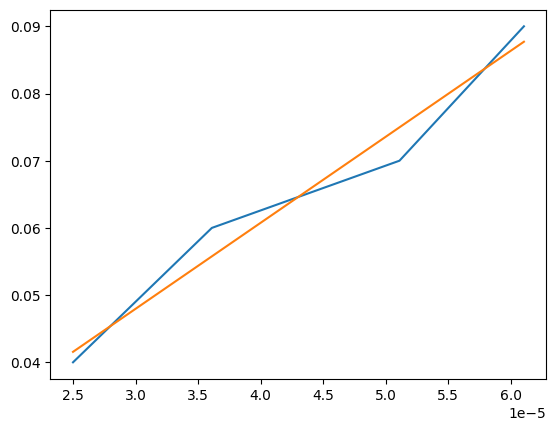

In [4]:
import numpy as np
from scipy.optimize import curve_fit
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
s_no_plate = analysis.System("sagnac", ["../../data/20240405/iter_0.tdms"])
s_no_plate.get_data()[0].apply("detrend", inplace = True)
s_no_plate.get_data()[0].apply("lowpass", cutoff = 10e6, inplace = True)
s_no_plate.get_data()[0].apply("bin_average", Npts = int(d.r / (10e6 * 2)))
s_no_plate.get_data()[0].apply("shift", tau = -0.0000002, inplace = True)
s_no_plate.get_data()[0].aggrigate(collection_slice = slice(1, len(s_no_plate.get_data()[0].collection), 1))
ax.plot(s_no_plate.get_data()[0].agg.t, s_no_plate.get_data()[0].agg.x)
s_no_plate.set_data([], ind = 0)

for i, d in enumerate(s.get_data()):
    d.apply("detrend", inplace = True)
    d.apply("lowpass", cutoff = 10e6, inplace = True)
    d.apply("bin_average", Npts = int(d.r / (10e6 * 2)))
    d.aggrigate(collection_slice = slice(1, len(d.collection), 1))
    ax.plot(d.agg.t, d.agg.x - 0.5 * (i + 1))
    s.set_data([], ind = i)
ax.set_xlim([0.000159, 0.00023])
start = 0.00016
# ax.axvline(start)
# ax.axvline(start + (0.00375 / 1480 ))
# ax.axvline(start + (0.0175 / 1480))
# ax.axvline(start + (0.021 / 1480))
# ax.axvline(start + (0.0265 / 1480))
# ax.axvline(start + (0.031 / 1480))
# ax.axvline(start + (0.034 / 1480))
# ax.axvline(start + (0.035 / 1480))

# IN THE 5TH DATA PLOTTED THERE IS AN OBVIOUS SIGNAL IDETIFIED AT 0.000185s
# 6th this appears around 0.000195s
# 7th this appears around 0.00021s
# 8th this appears around 0.00022s
# these are the WALL REFLECTIONS FOR SURE
# I think I may have not moved the wall exactly one centimeter between shots which would account for the 
# variation in the position of these vs what is estimated.

# ax.axvline(start + 6.756756756756757e-6 * 2)
print((0.000185 - 0.000158) * 1480)

print(0.01 / 1480)
plt.show()
time_of_arrivals = np.array([0.000184, 0.0001951, 0.0002101, 0.00022005])
distances = np.array([0.04, 0.06, 0.07, 0.09])
fig, ax = plt.subplots(1, 1)
def linear(x, a, b):
    return a * x + b
popt, pcov = curve_fit(linear, time_of_arrivals - 0.000159, distances)
ax.plot(time_of_arrivals - 0.000159, distances)
ax.plot(time_of_arrivals - 0.000159, linear(time_of_arrivals - 0.000159, *popt))
print(popt[0], "+/-", np.sqrt(np.diag(pcov))[0])
plt.show()